<a href="https://colab.research.google.com/github/Mooo49/projects/blob/main/Gold_Price_Prediction_using_Machine_Learning_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Libraries


In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

from  sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import  RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.svm import SVR

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score

In [2]:
data=pd.read_csv('/content/gld_price_data (1).csv')

In [3]:
data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [6]:
data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


<ipython-input-7-29af0fe00f94>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=data.corr()


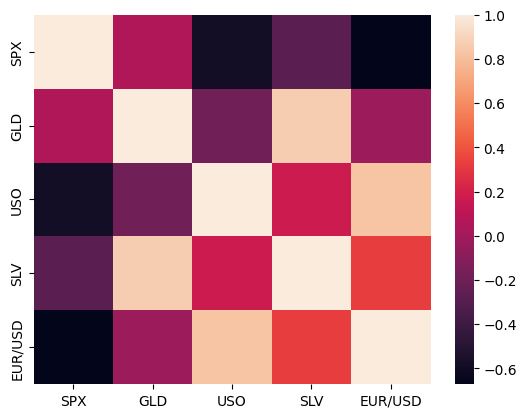

In [7]:
corr=data.corr()
sns.heatmap(corr)
plt.show()

In [8]:
x=data.drop(['GLD','Date'],axis=1)
y=data['GLD']

In [9]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=.8,random_state=44)

In [10]:
models=[DecisionTreeRegressor(),RandomForestRegressor(),KNeighborsRegressor(),HistGradientBoostingRegressor(),SVR()]

In [11]:
model=HistGradientBoostingRegressor()
model.fit(x_train,y_train)
print(model.score(x_test,y_test))

0.9861786827551547


In [12]:
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [5, 50, 100],
    'max_iter': [100, 200, 300]
}

# تحديد GridSearchCV مع نموذج HistGradientBoostingRegressor ومجموعة القيم المحتملة
grid_search = GridSearchCV(model, param_grid, cv=5)

# تدريب GridSearchCV على البيانات
grid_search.fit(x_train,y_train)


# عرض أفضل معلمات النموذج والدقة


# طباعة أفضل المعاملات وأفضل درجة أداء للنموذج
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'learning_rate': 0.1, 'max_depth': 50, 'max_iter': 300}
Best Score: 0.9877172029965641


<ipython-input-13-b7316a06455c>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1= sns.distplot(test_predict, hist=False, color="r", label="Actual Value")
<ipython-input-13-b7316a06455c>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test, hist=False, color="b", label="Fitted Values"

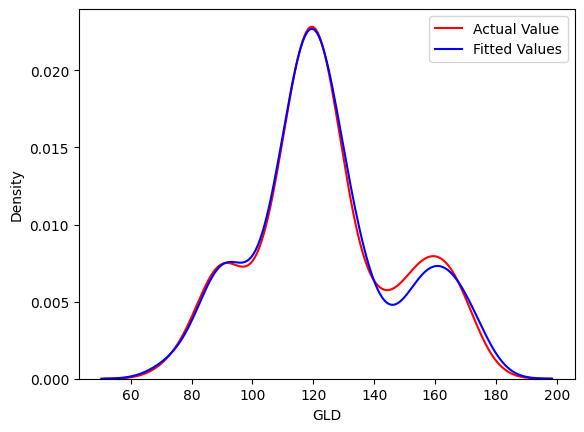

In [13]:
test_predict=grid_search.predict(x_test)
import seaborn as sns
import matplotlib.pyplot as plt

ax1= sns.distplot(test_predict, hist=False, color="r", label="Actual Value")
sns.distplot(y_test, hist=False, color="b", label="Fitted Values", ax=ax1)

plt.legend()
plt.show()

In [14]:
y_test = list(y_test)

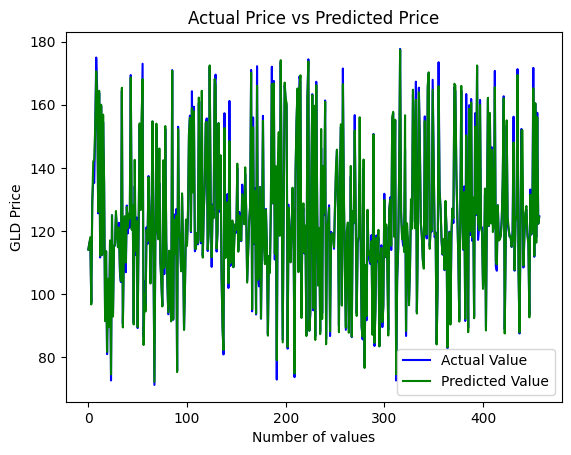

In [15]:
plt.plot(y_test, color='blue', label = 'Actual Value')
plt.plot(test_predict, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

Predictive system

In [16]:
import numpy as np
input=(1325.189941,71.540001,16.030001,1.461796)
array=np.asarray(input)
reshape=array.reshape(1,-1)
prediction=grid_search.predict(reshape)
print(prediction)

[87.86804945]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  warnings.warn(
